In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [4]:
## in this workbook, we will be looking at the free safety position
fs = df[df['Position'] == 'FS']

In [5]:
fscols = list(fs.columns.values)

In [6]:
print(fscols)


['Unnamed: 0', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position', 'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']


In [7]:
#We will remove the position variable now that we have the sorted dataframe
fs1 = fs[['Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic',
          'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 
          'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position',
          'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed',
          'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 
          'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt',
          'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']]

In [8]:
fscorr = fs1.corr()

In [9]:
fspos = fscorr[fscorr['Overall Rating'] >= 0.5]

In [10]:
fsneg = fscorr[fscorr['Overall Rating'] <= -0.5]

In [11]:
fspos['Overall Rating']
#These are the significant positive correlations

Awareness           0.872956
Overall Rating      1.000000
Play Recognition    0.866857
Stamina             0.598483
Zone Coverage       0.719915
Name: Overall Rating, dtype: float64

In [12]:
print(fsneg['Overall Rating'])
#There are no significant negative correlations

Series([], Name: Overall Rating, dtype: float64)


In [14]:
fssig = fs[['Awareness', 'Play Recognition', 'Stamina', 'Zone Coverage']]

In [16]:
X = add_constant(fssig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#It looks like the firs variable we will remove will be play recognition

const               955.783063
Awareness             6.916387
Play Recognition      7.195214
Stamina               1.496311
Zone Coverage         1.539237
dtype: float64

In [17]:
fssig1 = fs[['Awareness', 'Stamina', 'Zone Coverage']]

In [18]:
X = add_constant(fssig1)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Now that all of our vif scores are below 5, we can move on to statistical testing

const            953.857919
Awareness          1.576109
Stamina            1.495942
Zone Coverage      1.446778
dtype: float64

In [20]:
FS = sm.OLS(fs['Overall Rating'], fssig1).fit()
print(FS.summary())
#All of our variables appear to be significant

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.282e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):          7.82e-236
Time:                        19:59:13   Log-Likelihood:                -394.10
No. Observations:                 166   AIC:                             794.2
Df Residuals:                     163   BIC:                             803.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Awareness         0.3850      0.019     20.416

In [32]:
def model():
    pv = 0.3850*fs['Awareness']+ 0.1465*fs['Stamina'] + 0.4447*fs['Zone Coverage']
    return pv

In [33]:
fs['Predicted Value'] = model()
fs['Residual'] = fs['Predicted Value'] - fs['Overall Rating']

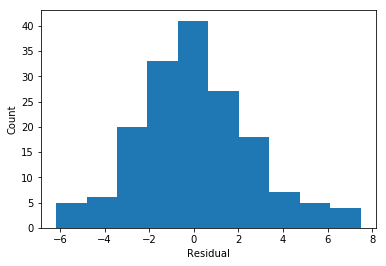

In [34]:
plt.hist(fs['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

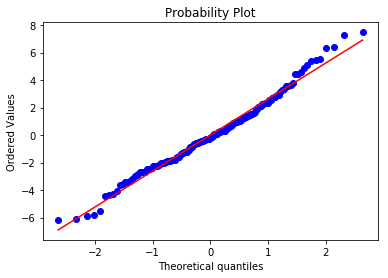

In [35]:
stats.probplot(fs['Residual'], plot=plt)
plt.show()
#The residuals look very evenly distributed

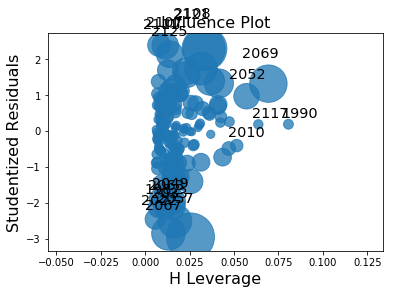

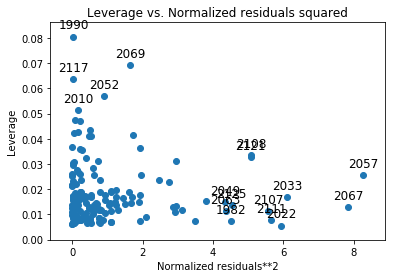

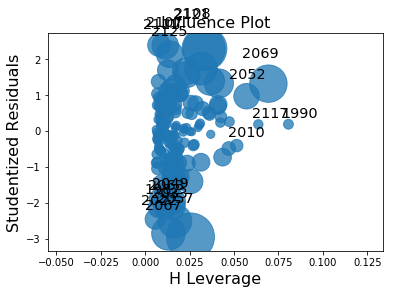

In [37]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(FS)
influence_plot(FS)
#There are some high residuals but the do not have high leverage scores so we will leave them in the model

In [38]:
X_train, X_test, y_train, y_test = train_test_split(fssig, fs['Overall Rating'], test_size = 0.3, random_state =42)

In [39]:
reg = LinearRegression()

In [40]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
y_pred = reg.predict(X_test)

In [43]:
fscv = cross_val_score(reg, fssig1, fs['Overall Rating'], cv =5)

In [44]:
fscv_mean = np.mean(fscv)

In [45]:
print(fscv, fscv_mean)
#It looks like it did well except for the last test but it still scored a 81.84%

[0.87269768 0.85090995 0.86675477 0.81658322 0.68529747] 0.8184486178883456


In [47]:
#We will use the Breusch-Pagan test for homoskedasticity
het_breuschpagan(fs['Residual'], fssig1)
#Based on the extremely low p-values we can reject the hypothesis that there is heteroskedasticity

(54.785338090390475,
 1.2691559468406769e-12,
 26.76508641157276,
 3.962308540862498e-14)

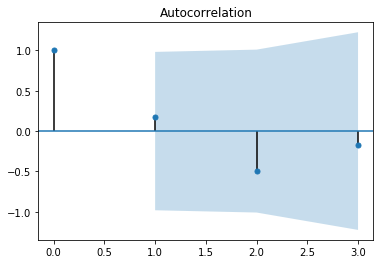

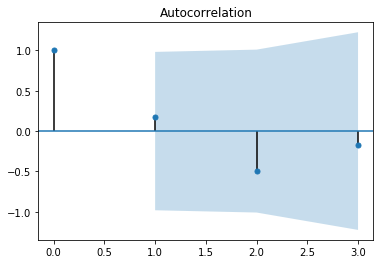

In [50]:
#Finally we check for autocorrelation
fscorr1 = fs[['Overall Rating', 'Awareness', 'Stamina', 'Zone Coverage']].corr()
plot_acf(fscorr1['Overall Rating'])
#There does not appear to be any significant amounts of autocorrelation

In [51]:
fsdesc = fs[['Overall Rating', 'Awareness', 'Stamina', 'Zone Coverage']]
fsdesc1 = fsdesc.describe()

In [52]:
fsdesc1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\fssig.csv')